In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_parquet("/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/MAY24_BDS_INT_Fire_Brigade/data/df_cleaned_for_classification_models.parquet")
df.head() 

,IncidentGroup_Fire,IncidentGroup_Special Service,AggregatedPropertyCategory_Outdoor,AggregatedPropertyCategory_Residential,AggregatedPropertyCategory_Vehicle,CellEastingNorthing2500_502500-175000,CellEastingNorthing2500_502500-177500,CellEastingNorthing2500_502500-180000,CellEastingNorthing2500_502500-182500,CellEastingNorthing2500_502500-187500,CellEastingNorthing2500_502500-190000,CellEastingNorthing2500_502500-192500,CellEastingNorthing2500_505000-172500,CellEastingNorthing2500_505000-175000,CellEastingNorthing2500_505000-177500,CellEastingNorthing2500_505000-180000,CellEastingNorthing2500_505000-182500,CellEastingNorthing2500_505000-185000,CellEastingNorthing2500_505000-187500,CellEastingNorthing2500_505000-190000,CellEastingNorthing2500_507500-170000,CellEastingNorthing2500_507500-172500,CellEastingNorthing2500_507500-175000,CellEastingNorthing2500_507500-177500,CellEastingNorthing2500_507500-180000,CellEastingNorthing2500_507500-182500,CellEastingNorthing2500_507500-185000,CellEastingNorthing2500_507500-187500,CellEastingNorthing2500_507500-190000,CellEastingNorthing2500_510000-167500,CellEastingNorthing2500_510000-170000,CellEastingNorthing2500_510000-172500,CellEastingNorthing2500_510000-175000,CellEastingNorthing2500_510000-177500,CellEastingNorthing2500_510000-180000,CellEastingNorthing2500_510000-182500,CellEastingNorthing2500_510000-185000,CellEastingNorthing2500_510000-187500,CellEastingNorthing2500_510000-190000,CellEastingNorthing2500_512500-167500,CellEastingNorthing2500_512500-170000,CellEastingNorthing2500_512500-172500,CellEastingNorthing2500_512500-175000,CellEastingNorthing2500_512500-177500,CellEastingNorthing2500_512500-180000,CellEastingNorthing2500_512500-182500,CellEastingNorthing2500_512500-185000,CellEastingNorthing2500_512500-187500,CellEastingNorthing2500_512500-190000,CellEastingNorthing2500_512500-192500,CellEastingNorthing2500_515000-157500,CellEastingNorthing2500_515000-160000,CellEastingNorthing2500_515000-162500,CellEastingNorthing2500_515000-165000,CellEastingNorthing2500_515000-167500,CellEastingNorthing2500_515000-170000,CellEastingNorthing2500_515000-172500,CellEastingNorthing2500_515000-175000,CellEastingNorthing2500_515000-177500,CellEastingNorthing2500_515000-180000,CellEastingNorthing2500_515000-182500,CellEastingNorthing2500_515000-185000,CellEastingNorthing2500_515000-187500,CellEastingNorthing2500_515000-190000,CellEastingNorthing2500_515000-192500,CellEastingNorthing2500_517500-160000,CellEastingNorthing2500_517500-162500,CellEastingNorthing2500_517500-165000,CellEastingNorthing2500_517500-167500,CellEastingNorthing2500_517500-170000,CellEastingNorthing2500_517500-172500,CellEastingNorthing2500_517500-175000,CellEastingNorthing2500_517500-177500,CellEastingNorthing2500_517500-180000,CellEastingNorthing2500_517500-182500,CellEastingNorthing2500_517500-185000,CellEastingNorthing2500_517500-187500,CellEastingNorthing2500_517500-190000,CellEastingNorthing2500_517500-192500,CellEastingNorthing2500_517500-195000,CellEastingNorthing2500_520000-162500,CellEastingNorthing2500_520000-165000,CellEastingNorthing2500_520000-167500,CellEastingNorthing2500_520000-170000,CellEastingNorthing2500_520000-172500,CellEastingNorthing2500_520000-175000,CellEastingNorthing2500_520000-177500,CellEastingNorthing2500_520000-180000,CellEastingNorthing2500_520000-182500,CellEastingNorthing2500_520000-185000,CellEastingNorthing2500_520000-187500,CellEastingNorthing2500_520000-190000,CellEastingNorthing2500_520000-192500,CellEastingNorthing2500_520000-195000,CellEastingNorthing2500_522500-160000,CellEastingNorthing2500_522500-162500,CellEastingNorthing2500_522500-165000,CellEastingNorthing2500_522500-167500,CellEastingNorthing2500_522500-170000,CellEastingNorthing2500_522500-172500,CellEastingNorthing2500_522500-175000,CellEastingNorthing2500_522500-177500,CellEastingNorthing2500_522500-180000,CellEastingNorthing2500_522500-182500,CellEastingNorthing2500_522500-185000,CellEastingNorthing2500_522500-187500,Cel

In [4]:
df.columns

Index(['IncidentGroup_Fire', 'IncidentGroup_Special Service',
       'AggregatedPropertyCategory_Outdoor',
       'AggregatedPropertyCategory_Residential',
       'AggregatedPropertyCategory_Vehicle',
       'CellEastingNorthing2500_502500-175000',
       'CellEastingNorthing2500_502500-177500',
       'CellEastingNorthing2500_502500-180000',
       'CellEastingNorthing2500_502500-182500',
       'CellEastingNorthing2500_502500-187500',
       ...
       'IsBankholiday', 'IsWeekend', 'DistanceStationLog', 'Hour_sin',
       'Hour_cos', 'Weekday_sin', 'Weekday_cos', 'Month_sin', 'Month_cos',
       'ResponseTimeBinary'],
      dtype='object', length=320)

# Model Training & Evaluation (Baseline)

In [4]:
X = df.drop("ResponseTimeBinary", axis = 1)
y = df["ResponseTimeBinary"]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 666)


### Decision Tree

In [24]:
decision_tree = DecisionTreeClassifier(random_state=666)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=666)

In [83]:
y_train_pred_dt = decision_tree.predict(X_train)
y_test_pred_dt = decision_tree.predict(X_test)
y_test_pred_prob_dt = decision_tree.predict_proba(X_test)

### Random Forest

In [28]:
random_forest = RandomForestClassifier(random_state=666)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=666)

In [84]:
y_train_pred_rf = random_forest.predict(X_train)
y_test_pred_rf = random_forest.predict(X_test)
y_test_pred_prob_rf = random_forest.predict_proba(X_test)

# Model Evaluation (Baseline)

In [93]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, balanced_accuracy_score

def evaluate_model(y_true, y_pred, y_proba = None):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix:\n', cm)
    
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    
    # Precision, Recall, F1-Score
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    
    print('Classification Report:\n', classification_report(y_true, y_pred, target_names=['Not Reached (>6 min)', 'Reached (<=6 min)']))
    
    # ROC AUC Score
    if y_proba is not None:
        roc_auc = roc_auc_score(y_true, y_proba[:, 1])
        print(f'ROC AUC Score: {roc_auc:.4f}')
    else:
        roc_auc = None
    
    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    print(f'Balanced Accuracy: {balanced_acc:.4f}')
    
    return accuracy, precision, recall, f1, roc_auc, balanced_acc

### Decision Tree

#### Evaluation Decision Tree (Training Data)

In [96]:
print("Decision Tree - Training Data")
evaluate_model(y_train, y_train_pred_dt)

Decision Tree - Training Data
Confusion Matrix:
 [[361254    200]
 [  3804 864905]]
Accuracy: 0.9967
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       0.99      1.00      0.99    361454
   Reached (<=6 min)       1.00      1.00      1.00    868709

            accuracy                           1.00   1230163
           macro avg       0.99      1.00      1.00   1230163
        weighted avg       1.00      1.00      1.00   1230163

Balanced Accuracy: 0.9975


(0.9967451467813615,
 0.9946742761022092,
 0.9975338837750455,
 0.9960896878101088,
 None,
 0.9975338837750455)

#### Evaluation Decision Tree (Test Data)

In [106]:
print("\nDecision Tree - Test Data")
dt_test_acc, dt_test_prec, dt_test_recall, dt_test_f1, dt_test_roc, dt_test_balacc = evaluate_model(y_test, y_test_pred_dt, y_test_pred_prob_dt)


Decision Tree - Test Data
Confusion Matrix:
 [[ 39121  51122]
 [ 49444 167854]]
Accuracy: 0.6730
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       0.44      0.43      0.44     90243
   Reached (<=6 min)       0.77      0.77      0.77    217298

            accuracy                           0.67    307541
           macro avg       0.60      0.60      0.60    307541
        weighted avg       0.67      0.67      0.67    307541

ROC AUC Score: 0.6034
Balanced Accuracy: 0.6030


### Random Forest

#### Evaluation Random Forest (Training Data)

In [105]:
print("\nRandom Forest - Training Data")
evaluate_model(y_train, y_train_pred_rf)


Random Forest - Training Data
Confusion Matrix:
 [[358410   3044]
 [   989 867720]]
Accuracy: 0.9967
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       1.00      0.99      0.99    361454
   Reached (<=6 min)       1.00      1.00      1.00    868709

            accuracy                           1.00   1230163
           macro avg       1.00      1.00      1.00   1230163
        weighted avg       1.00      1.00      1.00   1230163

Balanced Accuracy: 0.9952


(0.9967215726696381,
 0.9968762015283812,
 0.9952199935604599,
 0.9960433605192636,
 None,
 0.9952199935604599)

#### Evaluation Random Forest (Test Data)

In [104]:
print("\nRandom Forest - Test Data")
rf_test_acc, rf_test_prec, rf_test_recall, rf_test_f1, rf_test_roc, rf_test_balacc = evaluate_model(y_test, y_test_pred_rf, y_test_pred_prob_rf)


Random Forest - Test Data
Confusion Matrix:
 [[ 34753  55490]
 [ 23513 193785]]
Accuracy: 0.7431
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       0.60      0.39      0.47     90243
   Reached (<=6 min)       0.78      0.89      0.83    217298

            accuracy                           0.74    307541
           macro avg       0.69      0.64      0.65    307541
        weighted avg       0.72      0.74      0.72    307541

ROC AUC Score: 0.7242
Balanced Accuracy: 0.6384


# Evaluation Visualization (Baseline)

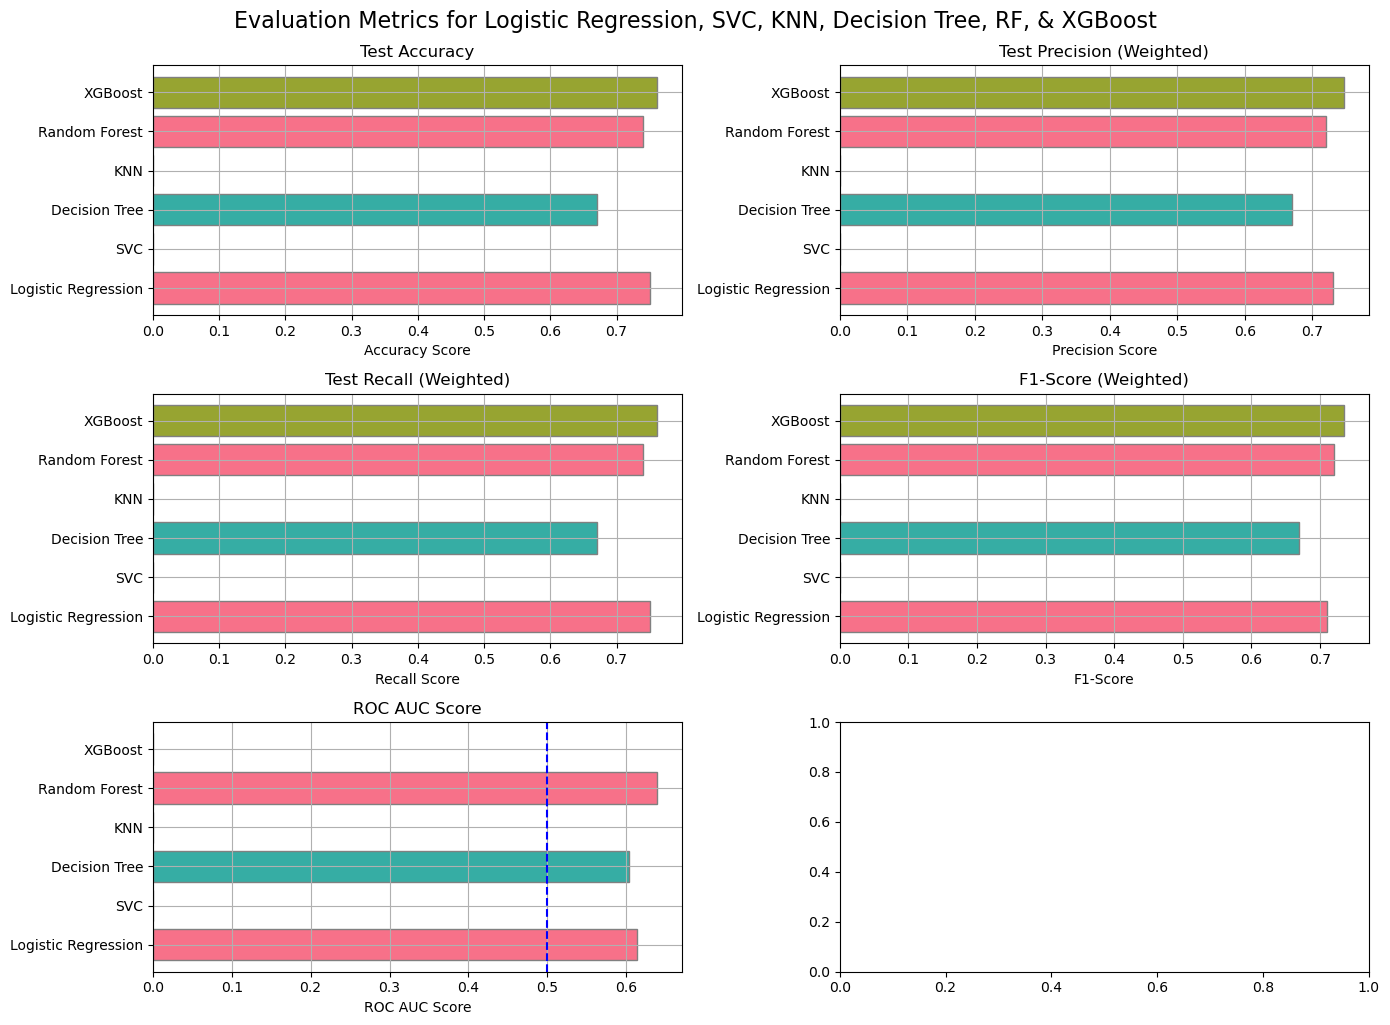

In [17]:
models = ['Logistic Regression', 'SVC', 'Decision Tree', 'KNN', 'Random Forest', 'XGBoost']

test_accuracy = [0.75, 0, 0.67, 0, 0.74, 0.760663]
test_precision = [0.73, 0, 0.67, 0, 0.72, 0.746485]
test_recall = [0.75, 0, 0.67, 0, 0.74, 0.760663]
test_f1score = [0.71, 0, 0.67, 0, 0.72, 0.734577]

test_rocauc = [0.6140058862580664, 0, 0.6033859641359862, 0, 0.638807562492847, 0]

colors = sns.color_palette("husl", 4)

fig, axs = plt.subplots(3, 2, figsize=(14, 10))

axs[0, 0].barh(models, test_accuracy, color=colors, edgecolor='grey')
axs[0, 0].set_title('Test Accuracy')
axs[0, 0].set_xlabel('Accuracy Score')
axs[0, 0].grid(True)

axs[0, 1].barh(models, test_precision, color=colors, edgecolor='grey')
axs[0, 1].set_title('Test Precision (Weighted)')
axs[0, 1].set_xlabel('Precision Score')
axs[0, 1].grid(True)

axs[1, 0].barh(models, test_recall, color=colors, edgecolor='grey')
axs[1, 0].set_title('Test Recall (Weighted)')
axs[1, 0].set_xlabel('Recall Score')
axs[1, 0].grid(True)

axs[1, 1].barh(models, test_f1score, color=colors, edgecolor='grey')
axs[1, 1].set_title('F1-Score (Weighted)')
axs[1, 1].set_xlabel('F1-Score')
axs[1, 1].grid(True)

axs[2, 0].barh(models, test_rocauc, color=colors, edgecolor='grey')
axs[2, 0].set_title('ROC AUC Score')
axs[2, 0].set_xlabel('ROC AUC Score')
axs[2, 0].grid(True)

axs[2, 0].axvline(x=0.5, color='b', linestyle='--', label='Random Model (0.5)')

plt.tight_layout()
plt.suptitle('Evaluation Metrics for Logistic Regression, SVC, KNN, Decision Tree, RF, & XGBoost', y=1.02, fontsize=16)
plt.savefig("/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/MAY24_BDS_INT_Fire_Brigade/img/eval_baseline_clf_models.png")
plt.show()

### ROC AUC Visualization

In [18]:
#tbd

# Undersampling Technique

In [36]:
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids

UndSam = RandomUnderSampler(random_state=666)
X_undsam, y_undsam = UndSam.fit_resample(X_train, y_train)
print('Sample classes undersampled :', dict(pd.Series(y_undsam).value_counts()))


Sample classes undersampled : {0: 361454, 1: 361454}


# Model Training & Evaluation (Undersampled)

### Decision Tree (Undersampled)

In [37]:
decision_tree_undsam = DecisionTreeClassifier(random_state=666)
decision_tree_undsam.fit(X_undsam, y_undsam)

DecisionTreeClassifier(random_state=666)

In [85]:
y_train_pred_dt_undsam = decision_tree_undsam.predict(X_undsam)
y_test_pred_dt_undsam = decision_tree_undsam.predict(X_test)
y_test_pred_prob_dt_undsam = decision_tree_undsam.predict_proba(X_test)

### Random Forest (Undersampled)

In [39]:
random_forest_undsam = RandomForestClassifier(random_state=666)
random_forest_undsam.fit(X_undsam, y_undsam)

RandomForestClassifier(random_state=666)

In [82]:
y_train_pred_rf_undsam = random_forest_undsam.predict(X_undsam)
y_test_pred_rf_undsam = random_forest_undsam.predict(X_test)
y_test_pred_prob_rf_undsam = random_forest_undsam.predict_proba(X_test)

# Model Evaluation (Undersampled)

### Decision Tree (Undersampled)

#### Evaluation Decision Tree (Training Data, Undersampled)

In [103]:
print("Decision Tree - Training Data (Undersampled)")
evaluate_model(y_undsam, y_train_pred_dt_undsam)

Decision Tree - Training Data (Undersampled)
Confusion Matrix:
 [[361411     43]
 [  1637 359817]]
Accuracy: 0.9977
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       1.00      1.00      1.00    361454
   Reached (<=6 min)       1.00      1.00      1.00    361454

            accuracy                           1.00    722908
           macro avg       1.00      1.00      1.00    722908
        weighted avg       1.00      1.00      1.00    722908

Balanced Accuracy: 0.9977


(0.9976760528310656,
 0.9976857317255141,
 0.9976760528310656,
 0.9976760415320935,
 None,
 0.9976760528310656)

#### Evaluation Decision Tree (Test Data, Undersampled)

In [102]:
print("Decision Tree - Test Data (Undersampled)")
dt_test_acc_ru, dt_test_prec_ru, dt_test_recall_ru, dt_test_f1_ru, dt_test_roc_ru, dt_test_balacc_ru = evaluate_model(y_test, y_test_pred_dt_undsam, y_test_pred_prob_dt_undsam)

Decision Tree - Test Data (Undersampled)
Confusion Matrix:
 [[ 54750  35493]
 [ 84002 133296]]
Accuracy: 0.6115
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       0.39      0.61      0.48     90243
   Reached (<=6 min)       0.79      0.61      0.69    217298

            accuracy                           0.61    307541
           macro avg       0.59      0.61      0.58    307541
        weighted avg       0.67      0.61      0.63    307541

ROC AUC Score: 0.6104
Balanced Accuracy: 0.6101


### Random Forest (Undersampled)

#### Evaluation Random Forest (Training Data, Undersampled)

In [107]:
print("\nRandom Forest - Training Data (Undersampled)")
evaluate_model(y_undsam, y_train_pred_rf_undsam)


Random Forest - Training Data (Undersampled)
Confusion Matrix:
 [[360493    961]
 [   725 360729]]
Accuracy: 0.9977
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       1.00      1.00      1.00    361454
   Reached (<=6 min)       1.00      1.00      1.00    361454

            accuracy                           1.00    722908
           macro avg       1.00      1.00      1.00    722908
        weighted avg       1.00      1.00      1.00    722908

Balanced Accuracy: 0.9977


(0.997667753019748,
 0.9976679651768732,
 0.997667753019748,
 0.9976677527711872,
 None,
 0.997667753019748)

#### Evaluation Random Forest (Test Data, Undersampled)

In [108]:
print("\nRandom Forest - Test Data (Undersampled)")
rf_test_acc_ru, rf_test_prec_ru, rf_test_recall_ru, rf_test_f1_ru, rf_test_roc_ru, rf_test_balacc_ru = evaluate_model(y_test, y_test_pred_rf_undsam, y_test_pred_prob_rf_undsam)


Random Forest - Test Data (Undersampled)
Confusion Matrix:
 [[ 58666  31577]
 [ 68834 148464]]
Accuracy: 0.6735
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       0.46      0.65      0.54     90243
   Reached (<=6 min)       0.82      0.68      0.75    217298

            accuracy                           0.67    307541
           macro avg       0.64      0.67      0.64    307541
        weighted avg       0.72      0.67      0.69    307541

ROC AUC Score: 0.7277
Balanced Accuracy: 0.6667


# PCA + Undersampling

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)


[6.54343175e-01 5.32203300e-01 5.14806503e-01 4.99943112e-01
 4.94973216e-01 4.68662112e-01 4.10316762e-01 3.39185563e-01
 2.02460411e-01 1.32471758e-01 8.02194373e-02 5.61907431e-02
 3.66088534e-02 3.09488398e-02 2.35764774e-02 1.98372054e-02
 1.94383179e-02 1.76447192e-02 1.69618682e-02 1.64500815e-02
 1.58425773e-02 1.46603844e-02 1.42345540e-02 1.35775544e-02
 1.32694346e-02 1.29845808e-02 1.26124480e-02 1.24052394e-02
 1.22416831e-02 1.20193491e-02 1.16364237e-02 1.11694136e-02
 1.09158207e-02 1.05987744e-02 9.98372087e-03 8.61115142e-03
 8.56080275e-03 8.48274970e-03 8.36406406e-03 8.28231912e-03
 8.16525216e-03 8.03769044e-03 7.90005631e-03 7.73628252e-03
 7.59606412e-03 7.45665415e-03 7.33549350e-03 7.20886705e-03
 7.01339151e-03 6.90470752e-03 6.76307645e-03 6.71921761e-03
 6.58420778e-03 6.45850090e-03 6.34080042e-03 6.26672350e-03
 6.18509683e-03 6.09276247e-03 6.01998382e-03 5.92318910e-03
 5.83856578e-03 5.75297354e-03 5.73304030e-03 5.64229880e-03
 5.59008100e-03 5.499493

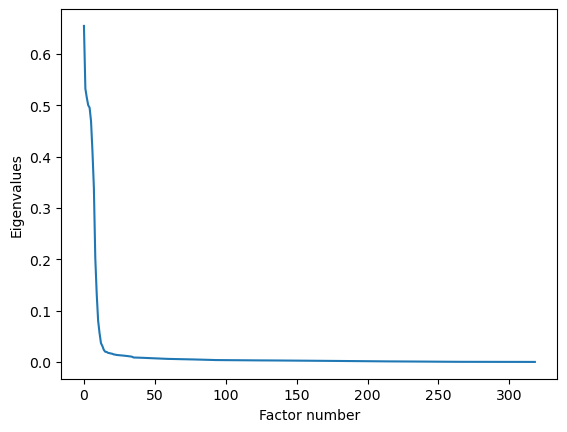

In [6]:
print(pca.explained_variance_)

plt.plot(range(0,len(pca.explained_variance_)), pca.explained_variance_)
plt.xlabel('Factor number')
plt.ylabel('Eigenvalues');


[1.20620767e-01 9.81056615e-02 9.48987587e-02 9.21588605e-02
 9.12427164e-02 8.63925618e-02 7.56372562e-02 6.25250239e-02
 3.73212879e-02 2.44196709e-02 1.47875463e-02 1.03581282e-02
 6.74842823e-03 5.70506872e-03 4.34605707e-03 3.65676454e-03
 3.58323414e-03 3.25260450e-03 3.12672864e-03 3.03238655e-03
 2.92040001e-03 2.70247611e-03 2.62397909e-03 2.50286864e-03
 2.44607025e-03 2.39356068e-03 2.32496219e-03 2.28676563e-03
 2.25661588e-03 2.21563113e-03 2.14504316e-03 2.05895513e-03
 2.01220813e-03 1.95376424e-03 1.84038607e-03 1.58736841e-03
 1.57808720e-03 1.56369900e-03 1.54182065e-03 1.52675189e-03
 1.50517192e-03 1.48165736e-03 1.45628606e-03 1.42609622e-03
 1.40024854e-03 1.37454989e-03 1.35221529e-03 1.32887314e-03
 1.29283943e-03 1.27280477e-03 1.24669668e-03 1.23861180e-03
 1.21372427e-03 1.19055162e-03 1.16885487e-03 1.15519963e-03
 1.14015267e-03 1.12313188e-03 1.10971596e-03 1.09187294e-03
 1.07627359e-03 1.06049563e-03 1.05682116e-03 1.04009399e-03
 1.03046823e-03 1.013769

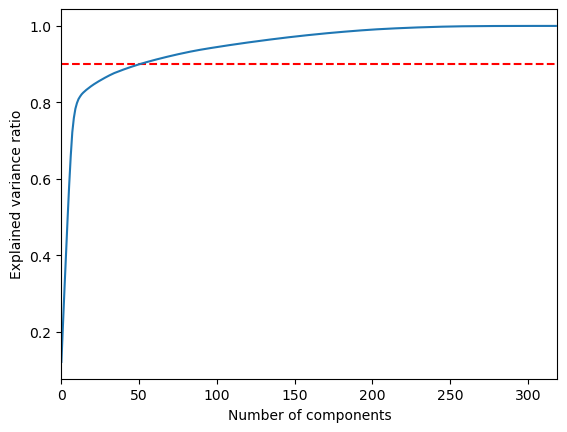

In [7]:
print(pca.explained_variance_ratio_)

plt.figure()
plt.xlim(0,len(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.axhline(y = 0.9, color = 'r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum());


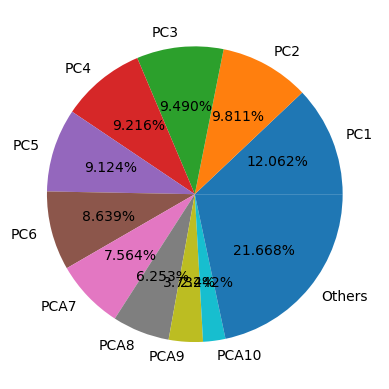

In [8]:
# Pie chart of the distribution of the explained variance ratio by each axis.
L1 = list(pca.explained_variance_ratio_[0:10]) # first 6 main principal components
L1.append(sum(pca.explained_variance_ratio_[10:X_pca.shape[1]])) # "Others"


plt.pie(L1, labels=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'Others'], autopct='%1.3f%%');


In [9]:
print("Explained Variance for 10 Components:",pca.explained_variance_ratio_[0:10].sum())
print("Explained Variance for 20 Components:",pca.explained_variance_ratio_[0:20].sum())
print("Explained Variance for 50 Components:",pca.explained_variance_ratio_[0:30].sum())

Explained Variance for 10 Components: 0.7833225643185457
Explained Variance for 20 Components: 0.8419195112468112
Explained Variance for 50 Components: 0.8665928408487957


#### PCA with 20 Components

In [10]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)

In [13]:
# Train & Test Split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size = 0.2, random_state = 666)

### Undersampling

In [14]:
rUs = RandomUnderSampler(random_state=666)
X_ru, y_ru = rUs.fit_resample(X_train_pca, y_train_pca)
print('Sample classes undersampled :', dict(pd.Series(y_ru).value_counts()))


Sample classes undersampled : {0: 361454, 1: 361454}


# Model Training (PCA + Undersampled)

### Decision Tree (PCA + Undersampled)

In [15]:
decision_tree_pca_ru = DecisionTreeClassifier(random_state=666)
decision_tree_pca_ru.fit(X_ru, y_ru)

DecisionTreeClassifier(random_state=666)

In [81]:
y_train_pred_dt_pca_ru = decision_tree_pca_ru.predict(X_ru)
y_test_pred_dt_pca_ru = decision_tree_pca_ru.predict(X_test_pca)
y_test_pred_prob_dt_pca_ru = decision_tree_pca_ru.predict_proba(X_test_pca)

### Random Forest (PCA + Undersampled)

In [17]:
random_forest_pca_ru = RandomForestClassifier(random_state=666)
random_forest_pca_ru.fit(X_ru, y_ru)

RandomForestClassifier(random_state=666)

In [18]:
y_train_pred_rf_pca_ru = random_forest_pca_ru.predict(X_ru)
y_test_pred_rf_pca_ru = random_forest_pca_ru.predict(X_test_pca)
y_test_pred_prob_rf_pca_ru = random_forest_pca_ru.predict_proba(X_test_pca)

# Model Evaluation (PCA + Undersampled)

### Decision Tree (PCA + Undersampled)

#### Evaluation Decision Tree (Training Data, PCA + Undersampled)

In [109]:
print("Decision Tree - Training Data (PCA + Undersampled)")
evaluate_model(y_ru, y_train_pred_dt_pca_ru)

Decision Tree - Training Data (PCA + Undersampled)
Confusion Matrix:
 [[361411     43]
 [  1637 359817]]
Accuracy: 0.9977
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       1.00      1.00      1.00    361454
   Reached (<=6 min)       1.00      1.00      1.00    361454

            accuracy                           1.00    722908
           macro avg       1.00      1.00      1.00    722908
        weighted avg       1.00      1.00      1.00    722908

Balanced Accuracy: 0.9977


(0.9976760528310656,
 0.9976857317255141,
 0.9976760528310656,
 0.9976760415320935,
 None,
 0.9976760528310656)

#### Evaluation Decision Tree (Test Data, PCA + Undersampled)

In [110]:
print("\nDecision Tree - Test Data (PCA + Undersampled)")
dt_test_acc_pca_ru, dt_test_prec_pca_ru, dt_test_recall_pca_ru, dt_test_f1_pca_ru, dt_test_roc_pca_ru, dt_test_balacc_pca_ru = evaluate_model(y_test_pca, y_test_pred_dt_pca_ru, y_test_pred_prob_dt_pca_ru)


Decision Tree - Test Data (PCA + Undersampled)
Confusion Matrix:
 [[ 53203  37040]
 [ 89907 127391]]
Accuracy: 0.5872
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       0.37      0.59      0.46     90243
   Reached (<=6 min)       0.77      0.59      0.67    217298

            accuracy                           0.59    307541
           macro avg       0.57      0.59      0.56    307541
        weighted avg       0.66      0.59      0.61    307541

ROC AUC Score: 0.5882
Balanced Accuracy: 0.5879


### Random Forest (PCA + Undersampled)

#### Evaluation Random Forest (Training Data, PCA + Undersampled)

In [111]:
print("\nRandom Forest - Training Data (PCA + Undersampled)")
evaluate_model(y_ru, y_train_pred_rf_pca_ru)


Random Forest - Training Data (PCA + Undersampled)
Confusion Matrix:
 [[360509    945]
 [   740 360714]]
Accuracy: 0.9977
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       1.00      1.00      1.00    361454
   Reached (<=6 min)       1.00      1.00      1.00    361454

            accuracy                           1.00    722908
           macro avg       1.00      1.00      1.00    722908
        weighted avg       1.00      1.00      1.00    722908

Balanced Accuracy: 0.9977


(0.9976691363216343,
 0.9976692964036336,
 0.9976691363216343,
 0.9976691361341958,
 None,
 0.9976691363216343)

In [112]:
print("\nRandom Forest - Test Data (PCA + Undersampled)")
rf_test_acc_pca_ru, rf_test_prec_pca_ru, rf_test_recall_pca_ru, rf_test_f1_pca_ru, rf_test_roc_pca_ru, rf_test_balacc_pca_ru = evaluate_model(y_test_pca, y_test_pred_rf_pca_ru, y_test_pred_prob_rf_pca_ru)


Random Forest - Test Data (PCA + Undersampled)
Confusion Matrix:
 [[ 57392  32851]
 [ 70216 147082]]
Accuracy: 0.6649
Classification Report:
                       precision    recall  f1-score   support

Not Reached (>6 min)       0.45      0.64      0.53     90243
   Reached (<=6 min)       0.82      0.68      0.74    217298

            accuracy                           0.66    307541
           macro avg       0.63      0.66      0.63    307541
        weighted avg       0.71      0.66      0.68    307541

ROC AUC Score: 0.7138
Balanced Accuracy: 0.6564


### Evaluation Comparison of Different Models

In [115]:
model_eval = {
    'Model': [
        'Decision Tree (B)', 'Decision Tree (U)', 'Decision Tree (PCA+U)',
        'Random Forest (B)', 'Random Forest (U)', 'Random Forest (PCA+U)'
    ],
    'Accuracy': [dt_test_acc, dt_test_acc_ru, dt_test_acc_pca_ru, rf_test_acc, rf_test_acc_ru, rf_test_acc_pca_ru],
    'Precision': [dt_test_prec, dt_test_prec_ru, dt_test_prec_pca_ru, rf_test_prec, rf_test_prec_ru, rf_test_prec_pca_ru],
    'Recall': [dt_test_recall, dt_test_recall_ru, dt_test_recall_pca_ru, rf_test_recall, rf_test_recall_ru, rf_test_recall_pca_ru],
    'F1 Score': [dt_test_f1, dt_test_f1_ru, dt_test_f1_pca_ru, rf_test_f1, rf_test_f1_ru, rf_test_f1_pca_ru],
    'ROC AUC Score': [dt_test_roc, dt_test_roc_ru, dt_test_roc_pca_ru, rf_test_roc, rf_test_roc_ru, rf_test_roc_pca_ru],
    'Balanced Accuracy': [dt_test_balacc, dt_test_balacc_ru, dt_test_balacc_pca_ru, rf_test_balacc, rf_test_balacc_ru, rf_test_balacc_pca_ru]
}

clf_test_eval = pd.DataFrame(model_eval)
clf_test_eval

,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC Score,Balanced Accuracy
0,Decision Tree (B),0.673000,0.604131,0.602984,0.603532,0.603363,0.602984
1,Decision Tree (U),0.611450,0.592154,0.610060,0.584337,0.610380,0.610060
2,Decision Tree (PCA+U),0.587219,0.573251,0.587901,0.561715,0.588158,0.587901
3,Random Forest (B),0.743114,0.686924,0.638449,0.649350,0.724175,0.638449
4,Random Forest (U),0.673504,0.642369,0.666658,0.643073,0.727693,0.666658
5,Random Forest (PCA+U),0.664867,0.633589,0.656420,0.633714,0.713785,0.656420


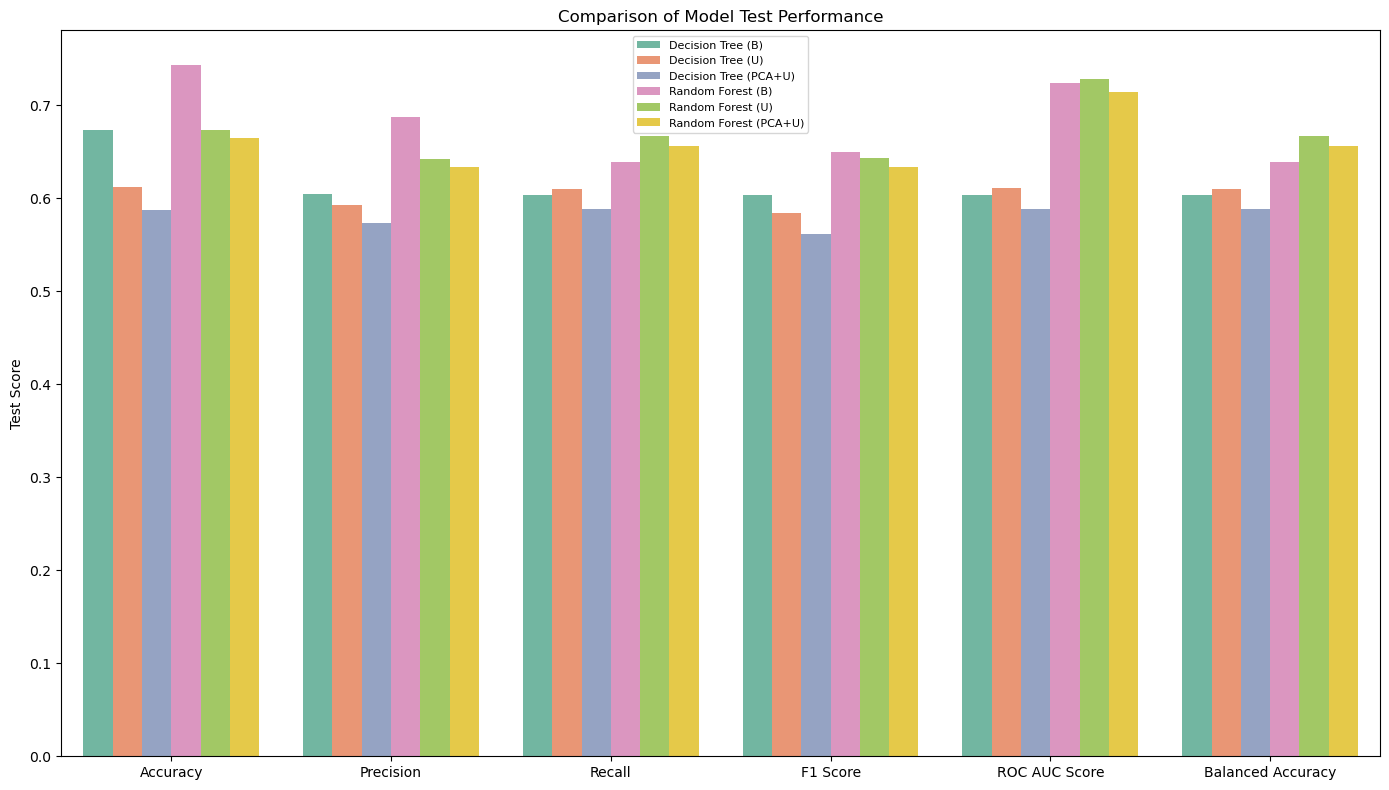

In [123]:
df_melted = clf_test_eval.melt(id_vars='Model', var_name='Metric', value_name='Score')

sns.set_palette('Set2')

plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Metric', y='Score', hue='Model')

plt.title('Comparison of Model Test Performance')
plt.xlabel('')
plt.ylabel('Test Score')
plt.legend(loc='upper center', prop={'size': 8}) 

plt.tight_layout()
plt.savefig("/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/MAY24_BDS_INT_Fire_Brigade/img/comp_test_perf_clf_models.png")
plt.show()

### Receiver Operating Characteristic Curve

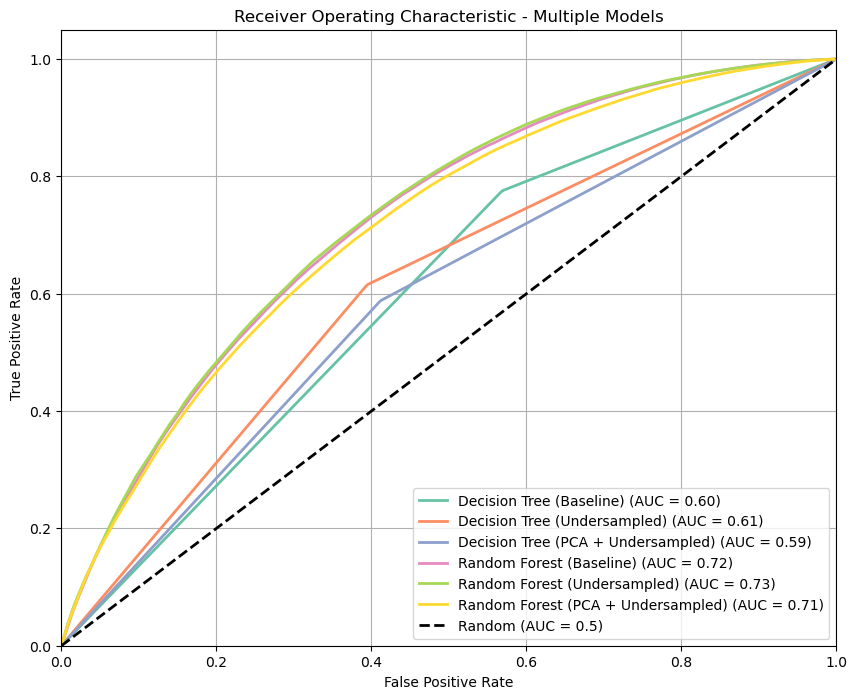

In [130]:
from sklearn.metrics import roc_curve, auc

model_probas = {
    'Decision Tree (Baseline)': y_test_pred_prob_dt,
    'Decision Tree (Undersampled)': y_test_pred_prob_dt_undsam,
    'Decision Tree (PCA + Undersampled)': y_test_pred_prob_dt_pca_ru,
    'Random Forest (Baseline)': y_test_pred_prob_rf,
    'Random Forest (Undersampled)': y_test_pred_prob_rf_undsam,
    'Random Forest (PCA + Undersampled)': y_test_pred_prob_rf_pca_ru,
}

true_labels = {
    'Decision Tree (Baseline)': y_test,
    'Decision Tree (Undersampled)': y_test,
    'Decision Tree (PCA + Undersampled)': y_test_pca,
    'Random Forest (Baseline)': y_test,
    'Random Forest (Undersampled)': y_test,
    'Random Forest (PCA + Undersampled)': y_test_pca,
}

def plot_roc_auc_multiple_models(true_labels, model_probas):
    plt.figure(figsize=(10, 8))
    
    for model_name, y_proba in model_probas.items():
        y_true = true_labels[model_name]
        fpr, tpr, _ = roc_curve(y_true, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    
    # Plot the random line
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Random (AUC = 0.5)')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Multiple Models')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.savefig("/Users/bennyschellinger/Desktop/DataScience/MLE_DataScientest/04_Projekt/MAY24_BDS_INT_Fire_Brigade/img/roc_test_perf_clf_models.png")
    plt.show()

plot_roc_auc_multiple_models(true_labels, model_probas)